<a href="https://colab.research.google.com/github/bettytom/major-projects/blob/main/feature_engineering_and_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Feature engineering
- One-hot encoding- One-hot encoding is processed in 2 steps: 
    - Splitting of categories to different columns.
    - Put ‘0 for others and ‘1’ as an indicator for the appropriate column.
- Labelencoding- it considers an order for encoding, Hence can be used for encoding ordinal data.(categorical data) 

In [ ]:
#lets do some examples
#load libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [ ]:
#load data
marketing=pd.read_csv("DirectMarketing.csv")
marketing.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent
0,Old,Female,Own,Single,Far,47500,0,High,6,755
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304


### Things to look at in feature engineering
- Percent of missing values
- Amount of variation- drop variables with zero variation. Drop variables that have same values all over the data
- Pairwise correlation- if two features are highly correlated, drop one of them.You have to keep one thta has high correlation coefficient with your target.Features that have a low correlation with your target should be dropped.

In [ ]:
#looking at missing values,outliers and duplicates and the info on the data
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Age          1000 non-null   object
 1   Gender       1000 non-null   object
 2   OwnHome      1000 non-null   object
 3   Married      1000 non-null   object
 4   Location     1000 non-null   object
 5   Salary       1000 non-null   int64 
 6   Children     1000 non-null   int64 
 7   History      697 non-null    object
 8   Catalogs     1000 non-null   int64 
 9   AmountSpent  1000 non-null   int64 
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [ ]:
print("Missing values: ",marketing.isna().sum())
print("duplicates: ",marketing.duplicated().sum())

Missing values:  Age              0
Gender           0
OwnHome          0
Married          0
Location         0
Salary           0
Children         0
History        303
Catalogs         0
AmountSpent      0
dtype: int64
duplicates:  0


In [ ]:
#missing values, duplicates and unique values or use sweetviz


In [ ]:
#fill in missing values
marketing['History'].fillna(method="pad",limit=5,inplace=True)
marketing['History'].isna().sum()

0

### Correlation with target
- What is our target? Amount spent

In [ ]:
#now use onehotencoding
onehot=OneHotEncoder()
g=onehot.fit_transform(marketing[['Gender']]).toarray()
gender=pd.DataFrame(g)
new_gender=pd.concat([marketing,gender],axis=1)
new_gender.head()
#using gender


,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent,0,1
0,Old,Female,Own,Single,Far,47500,0,High,6,755,1.0,0.0
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318,0.0,1.0
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296,1.0,0.0
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436,0.0,1.0
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304,1.0,0.0


In [ ]:
#labelencoding
#using gender
label=LabelEncoder()
ge=label.fit_transform(marketing[['Gender']])
Gender=pd.DataFrame(ge)
new_Gender=pd.concat([marketing,Gender],axis=1)
new_Gender.head()


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent,0
0,Old,Female,Own,Single,Far,47500,0,High,6,755,0
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318,1
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296,0
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436,1
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304,0


In [ ]:
#using labelencoding
marketing['Age']=label.fit_transform(marketing['Age'])
marketing['Gender']=label.fit_transform(marketing['Gender'])
marketing['OwnHome']=label.fit_transform(marketing['OwnHome'])
marketing['Married']=label.fit_transform(marketing['Married'])
marketing['Location']=label.fit_transform(marketing['Location'])
marketing['History']=label.fit_transform(marketing['History'])

In [ ]:
marketing.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent
0,1,0,0,1,1,47500,0,0,6,755
1,0,1,1,1,0,63600,0,0,6,1318
2,2,0,1,1,0,13500,0,1,18,296
3,0,1,0,0,0,85600,1,0,18,2436
4,0,0,0,1,0,68400,0,0,12,1304


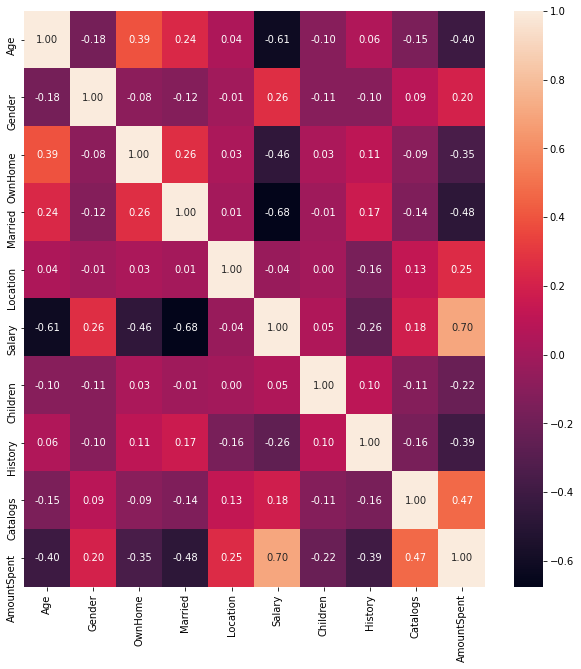

In [ ]:
#using heatmap to view all correlations
fig=plt.figure(figsize=(8,8))
ax=fig.add_axes([0,0,1,1])
sns.heatmap(marketing.corr(),annot=True,fmt='.2f');

## Feature Selection
- Filter method
- Wrapper method
- Embedded method

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
target=marketing['AmountSpent']
features=marketing[['Gender','Salary','Location','Catalogs', 'History','Married','Age','OwnHome','Children']]

In [ ]:
select=SelectKBest(f_regression, k=5).fit(features,target)

In [ ]:
feature_mask=select.get_support()
feature_mask


array([False,  True, False,  True,  True,  True,  True, False, False])

In [ ]:
select.scores_

array([ 42.31907952, 956.69400352,  68.02824177, 287.08541076,
       179.25655432, 292.17537961, 192.4564106 , 140.05632645,
        51.88635174])

In [ ]:
#wrapper method
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
rfe=RFE(estimator=LinearRegression(),n_features_to_select=5,step =1)

In [ ]:
rfe.fit(features,target)
rfe_features=rfe.get_support()
rfe_features

array([False, False,  True, False,  True,  True,  True,  True, False])

In [ ]:
# emebedded method
from sklearn.linear_model import Lasso

In [ ]:
lasso=Lasso(alpha=1.0)
lasso.fit(features,target)
lasso.coef_

array([-4.16026963e+01,  2.04634320e-02,  4.61984160e+02,  4.15600344e+01,
       -1.40455444e+02,  3.37562553e+01,  1.90878380e+01, -4.38257583e+01,
       -1.91262978e+02])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


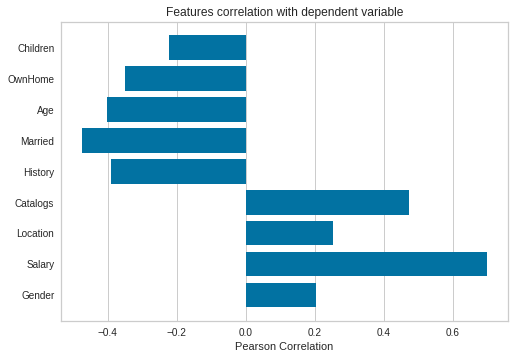

In [ ]:
from yellowbrick.target import FeatureCorrelation
visualize=FeatureCorrelation(labels=features.columns,method='pearson')
visualize.fit(features,target)
visualize.poof() #mode of display

In [ ]:
!pip install sweetviz

     |████████████████████████████████| 15.1 MB 181 kB/s 
     |████████████████████████████████| 76 kB 3.9 MB/s 
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1


                                             |          | [  0%]   00:00 -> (? left)


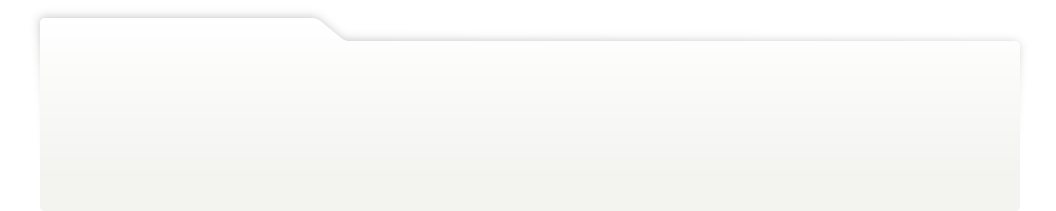
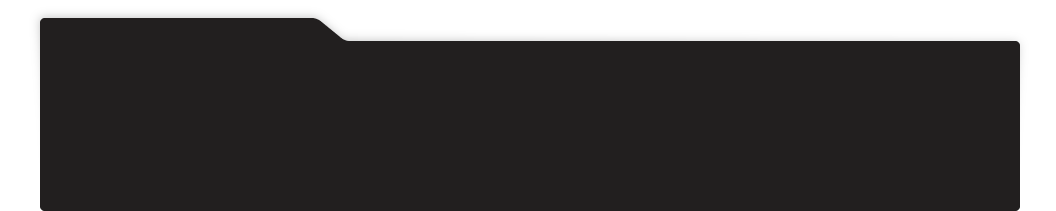
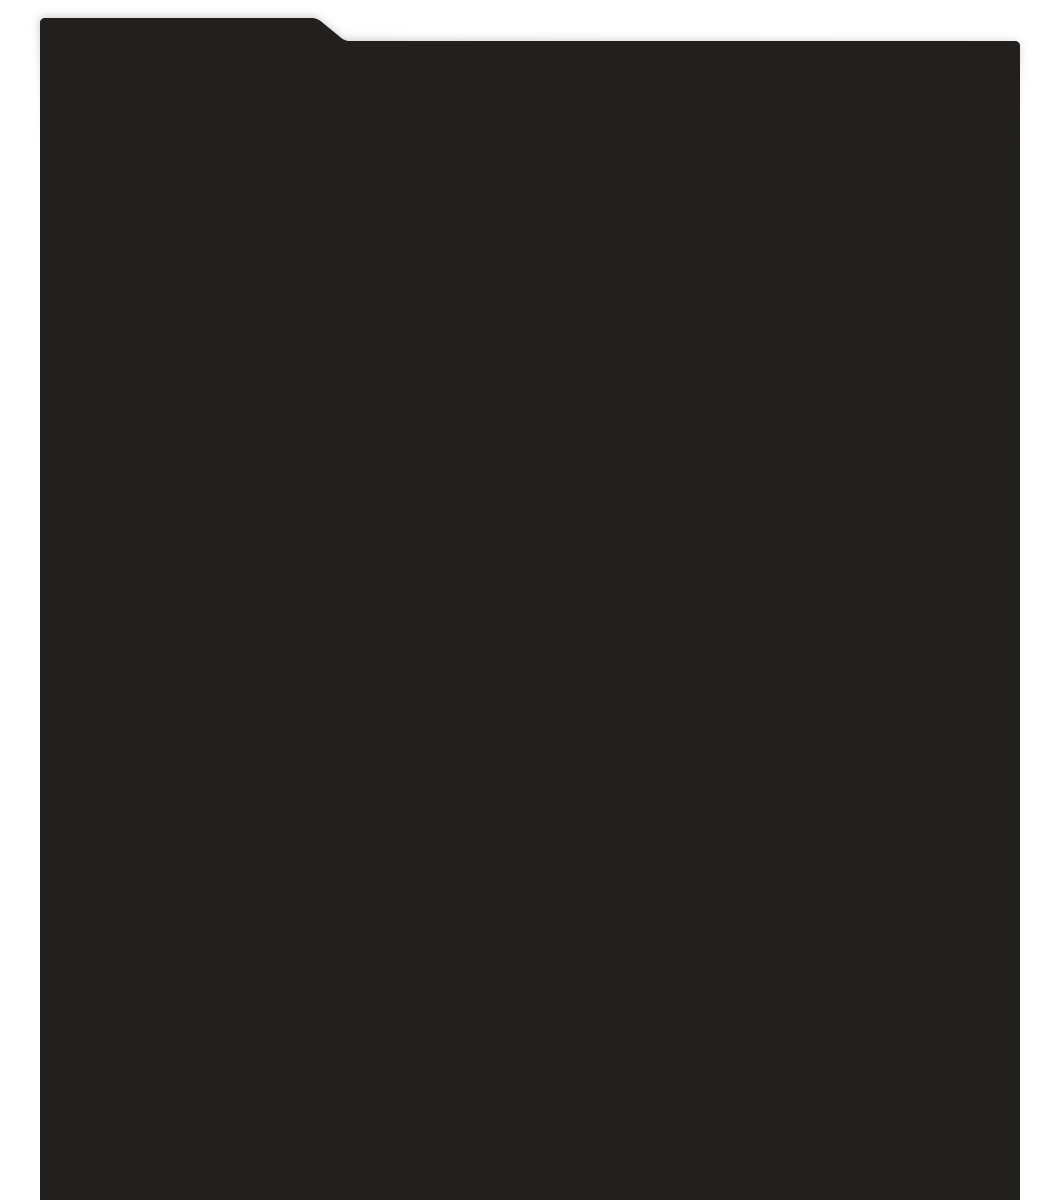
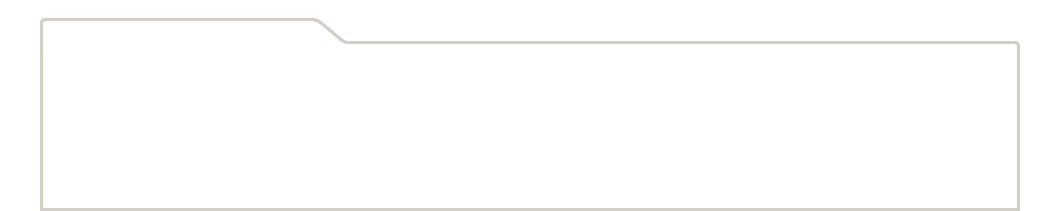
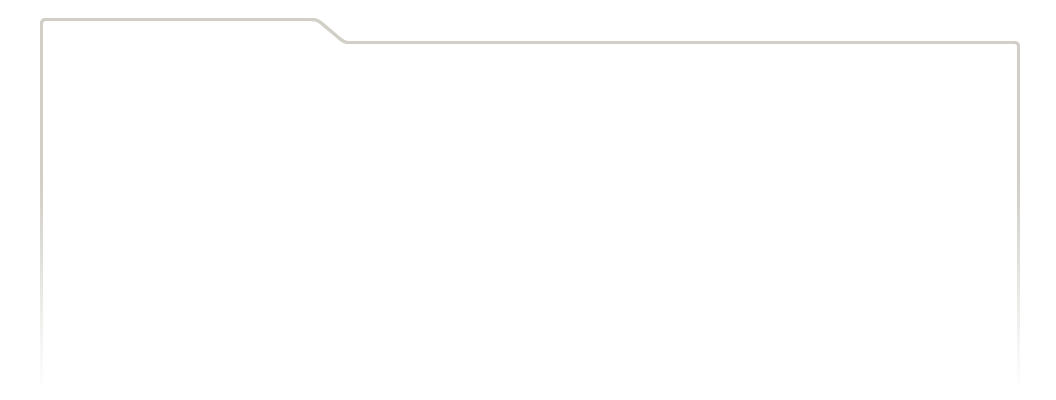
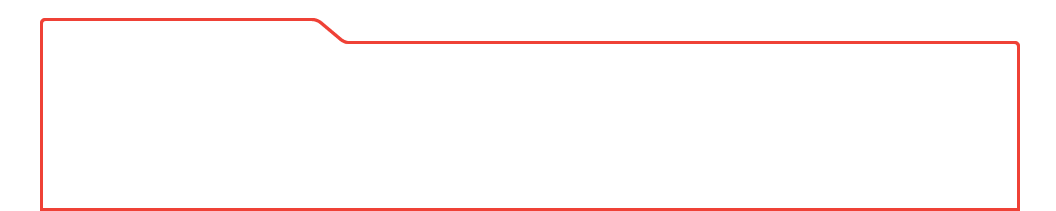
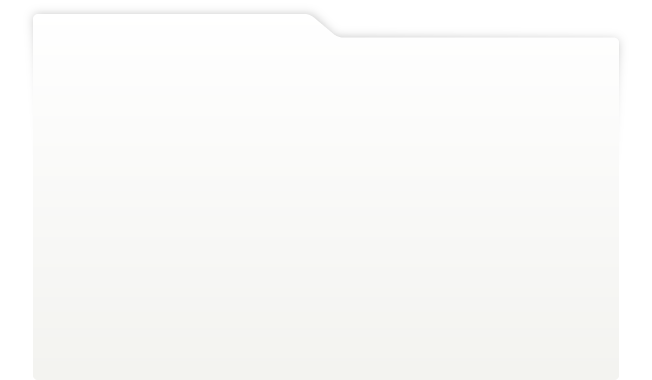
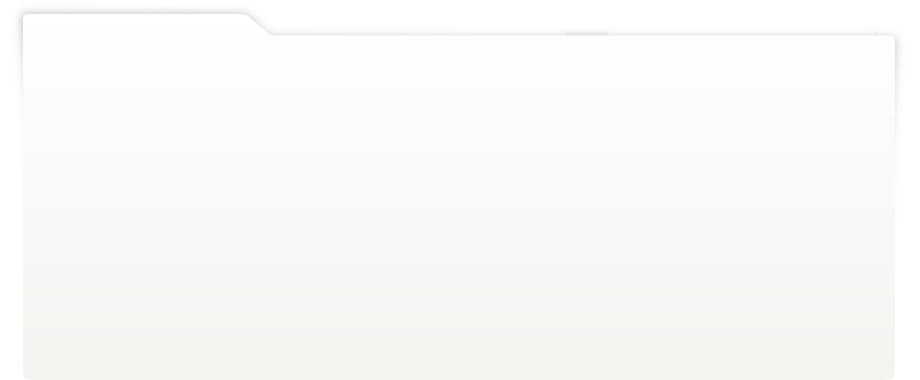
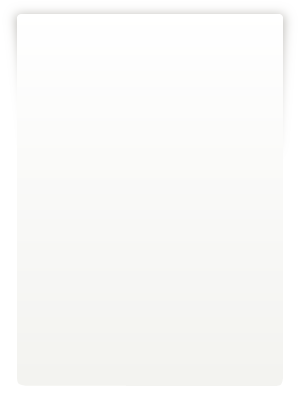
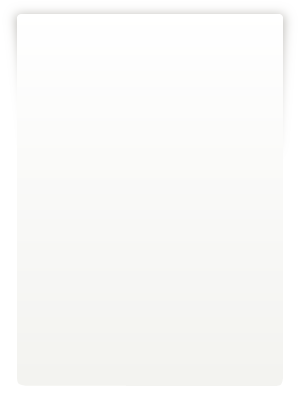
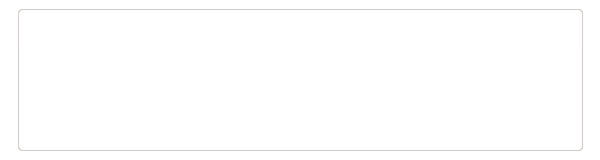
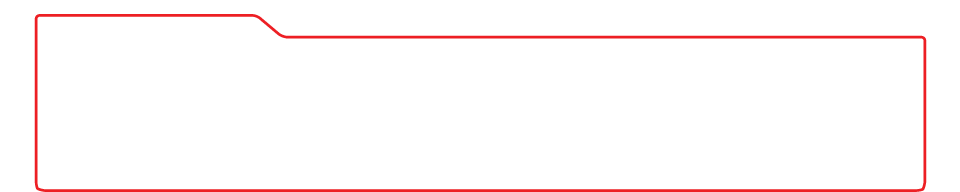
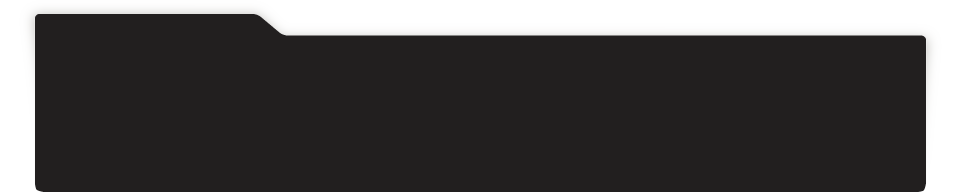
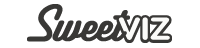
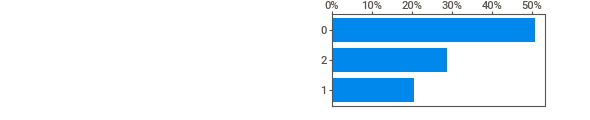
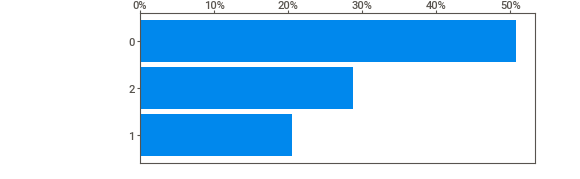
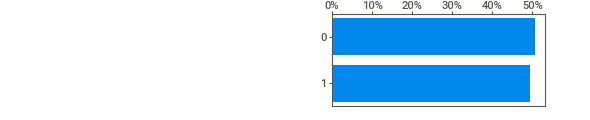
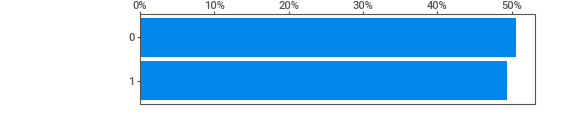
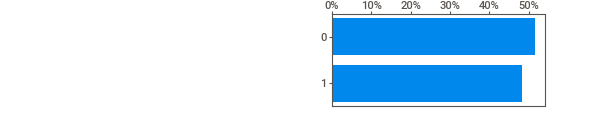
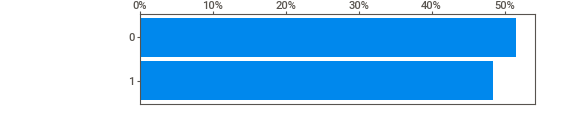
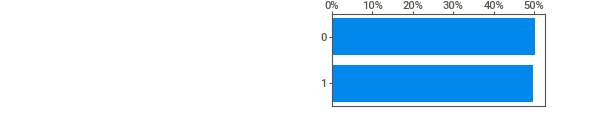
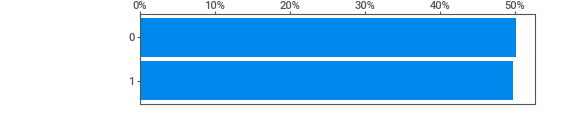
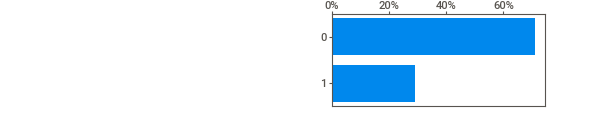
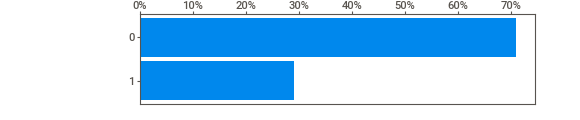
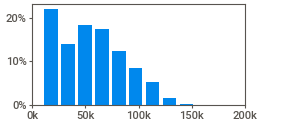
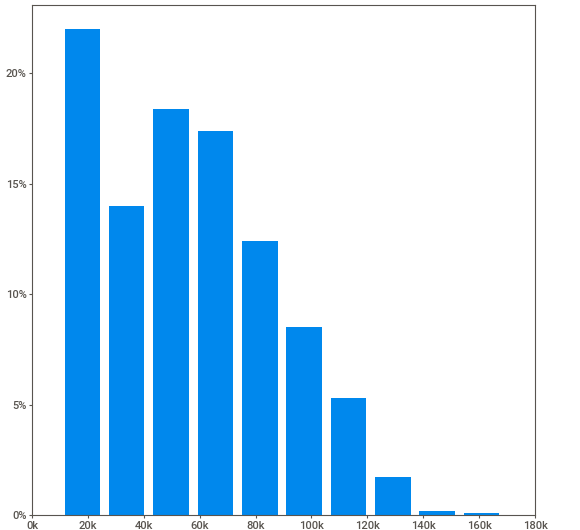
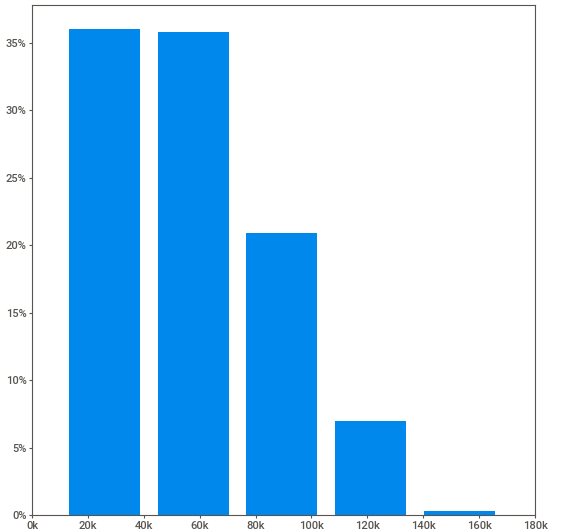
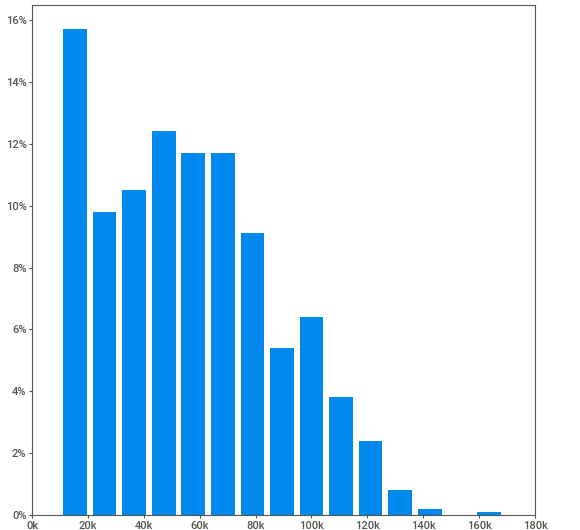
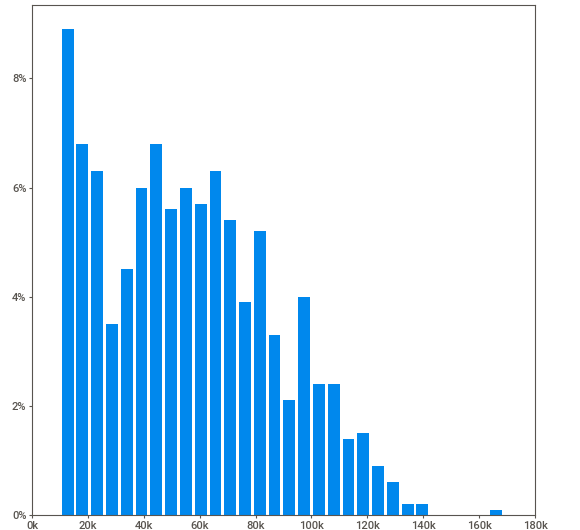
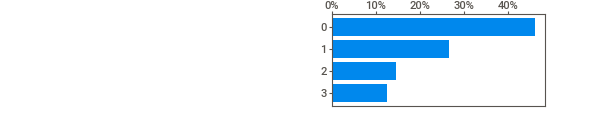
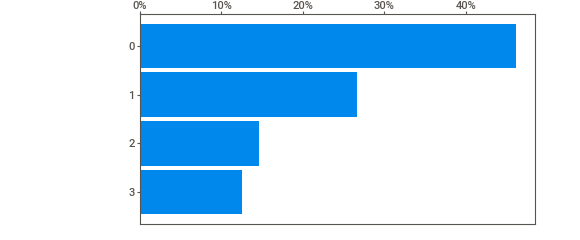
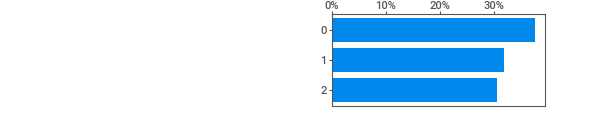
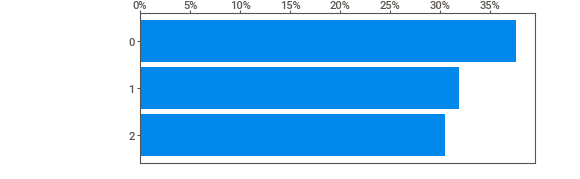
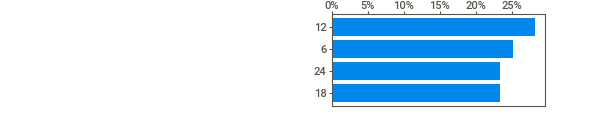
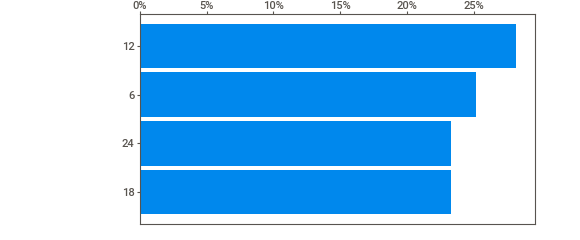
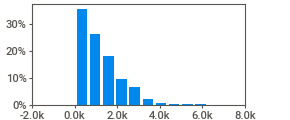
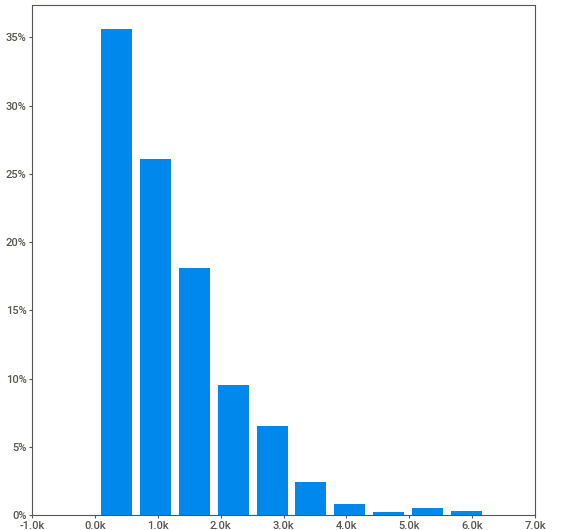
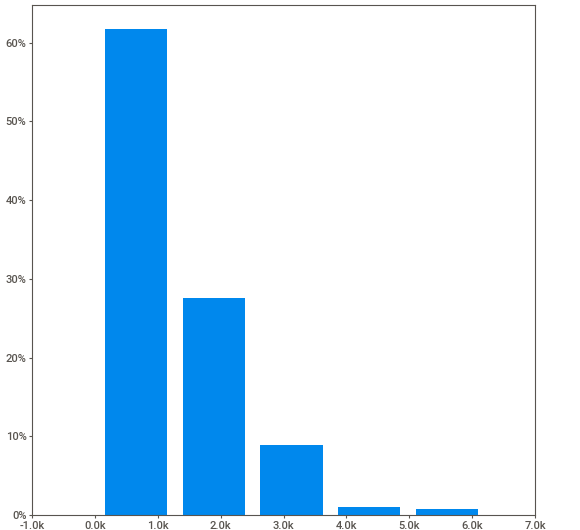
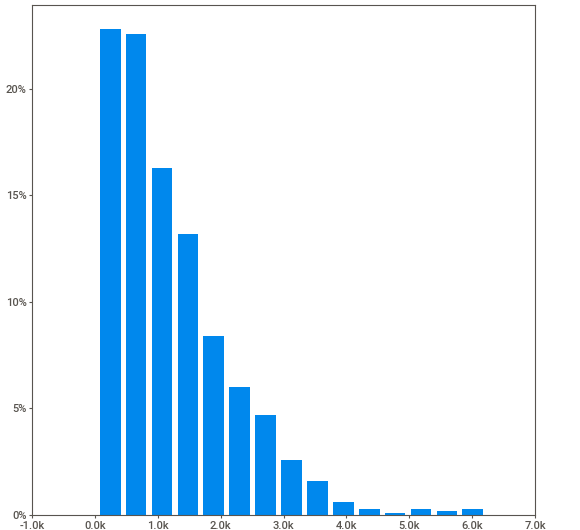
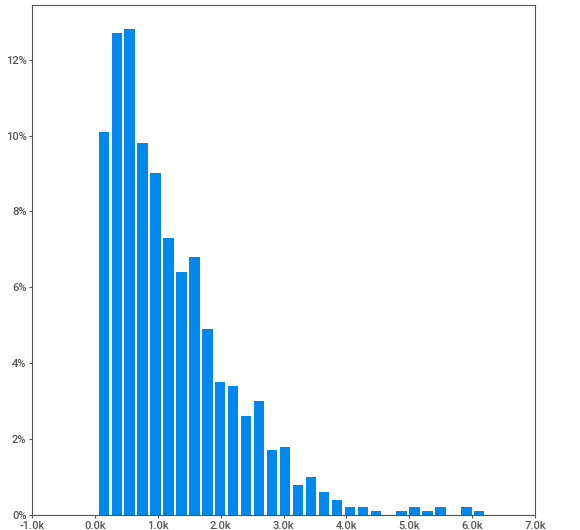
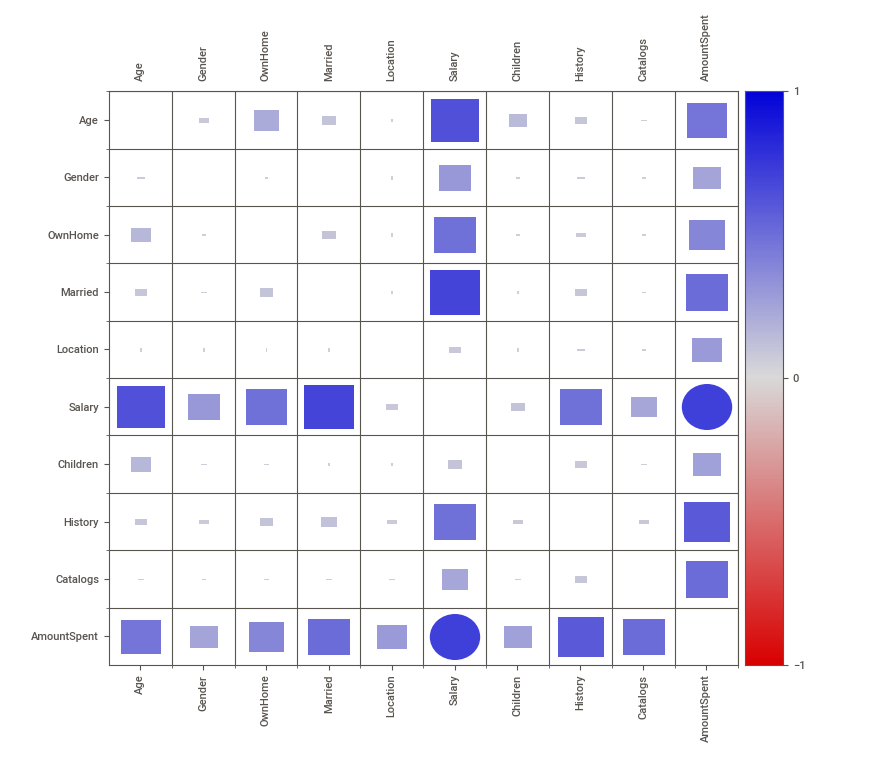
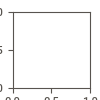

In [ ]:
import sweetviz as sv
marketing_report=sv.analyze(marketing)
marketing_report.show_notebook()

In [ ]:
#split the data
from sklearn.model_selection import train_test_split
X= marketing[['Salary','OwnHome','Gender','Children','History','Catalogs','Location','Married','Age']]
Y=marketing['AmountSpent']

In [ ]:
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,train_size=0.5,test_size=0.5,random_state=123)
print(train_Y.shape)


(500,)


In [ ]:
print(test_Y.shape)

(500,)


In [ ]:
print(train_X.shape)

(500, 9)


In [ ]:
print(test_X.shape)

(500, 9)


In [ ]:
#lets invoke the Linear regression
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(train_X,train_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## This is the equation
    y=weight*x+intercept
plugging in the max and min values into the equation, we can plot the regression  to our training data

In [ ]:
#making the linear graph using min and max points using the formula above
min_point=X.min()*regressor.coef_[0] + regressor.intercept_
max_point=X.max()* regressor.coef_[0] + regressor.intercept_
plt.plot([X.min(),X.max()],[min_point,max_point])
plt.plot(train_X,train_Y,'m');

NameError: ignored

In [ ]:
#using 'predict' to get more info on the train values

train_pred_x=regressor.predict(train_X)

In [ ]:
fig=plt.figure(figsize=(5,5))
dx=fig.add_axes([0,0,1,1])
dx.plot(train_X,train_Y,'c',label="data")
dx.plot(train_X,train_pred_x,'o',label="prediction")
dx.plot([X.min(),X.max()],[min_point,max_point],'m',label="fit")
plt.legend(loc="best");

In [ ]:
#doing the same for test data
test_pred_b=regressor.predict(test_X)

In [ ]:
fig=plt.figure(figsize=(5,5))
dx=fig.add_axes([0,0,1,1])
dx.plot(test_X,test_Y,'c',label="data")
dx.plot(test_X,test_pred_b,'o',label="prediction")
dx.plot([X.min(),X.max()],[min_point,max_point],'m',label="fit")
plt.legend(loc="best");

In [ ]:
linear_predict=regressor.predict(test_X)

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
mean_squared_error(test_Y,test_pred_b)

In [ ]:
r2_score(test_Y,test_pred_b)

In [ ]:
# random forest and decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random=RandomForestClassifier(n_estimators=250,
                              max_depth=12,
                              min_samples_leaf=16)
decision=DecisionTreeClassifier(max_depth=12,
                               min_samples_split=8,
                               random_state=1024)

In [ ]:
random.fit(train_X,train_Y)

In [ ]:
decision.fit(train_X,train_Y)

In [ ]:
random_predict=random.predict(test_X)

In [ ]:
decision_predict=decision.predict(test_X)

In [ ]:
#measuring the score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
print('Accuracy Score is {:.5}'.format(accuracy_score(test_Y, random_predict)))
print(pd.DataFrame(confusion_matrix(test_Y, random_predict)))

sns.set_style('white') 
class_names = ['0','1']

In [ ]:

print('Accuracy Score is {:.5}'.format(accuracy_score(test_Y, decision_predict)))
print(pd.DataFrame(confusion_matrix(test_Y, decision_predict)))

sns.set_style('white') 
class_names = ['0','1']

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score


In [ ]:
mean_squared_error(test_Y,random_predict)

In [ ]:
r2_score(test_Y,decision_predict)

In [ ]:
mean_squared_error(test_Y, decision_predict)

In [ ]:
r2_score(test_Y,decision_predict)